# Pymaceuticals Inc.
---

### Analysis


<p>In this analysis we’ll be looking at a 45 day study in which 249 mice identified with SCC tumors were administered treatment from a variety of drug regimens for the purpose of comparing Capomulin’s performance against other treatments.</p> 


<p>A few things to point out before moving on is that a large portion of the mice didn’t last for the entire 45 day long study period and the data for one mouse had to be removed due to duplicate entries which didn’t match, changing our total to 248 (fortunately this mouse was administered the Propriva regimen so I’d expect no impact on our findings). Final note before we proceed is that the mouse age values appear to be static throughout the study as the age of mouse g989 (in months) remained unchanged over the course of the 35 days we treated her.</p> 


<p>Moving on to take a look at the summary stats we may notice that tumor volume and variance metrics are lower for mice on the Capomulin and Ramicane regimens which on the surface appears to be a sign of success, and while this may be true, later we’ll get into some reasons why it may be misleading. Similar conclusions can be taken from the total timepoints data as the mice undergoing the Capomulin and Ramicane regimens appear to have survived longer and therefor tallied more administrations. Promising to say the least.</p>


<p>However, in proceeding to the outliers portion of the analysis we find statistically significant number for both the Capomulin (10 ouliers) and Ramicane (12 outliers) regimens respectively. The box plot portion of the analysis shows again the lower tumor volume, but their narrower IQR suggests less movement over the coarse of the study.  However, when we look at an isolated example of mouse r944 (treated with Capomulin) we see gradual growth in tumor volume over the first two weeks followed by  a sharp decline over the following weeks. This pattern was observed in others as well and would account for the narrow IQR stats we saw.</p>


<p>Before wrapping up there is a noteworthy finding that we should consider in this analysis. The correlation between mouse weight and average tumor volume is undeniable. The heavier mice had the largest tumors on average as the scatter plots show. In addition, the Capomulin and Ramicane studies had by far the lightest average mouse weight. This doesn’t negate our findings as correlation is not causation, but it is a worthy consideration and we should look into assuring mouse weights are more evenly distributed in future studies.</p>

	
<p>In summary, I do consider these findings promising for Capomulin’s effectiveness. Having a clear  impact in reducing tumor volume in mice.</p>

In [102]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_df = pd.merge(study_results, mouse_metadata, how='left', on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [103]:
# Checking the number of mice.
mice_count = len((study_df['Mouse ID']).value_counts(dropna=False))
mice_count

249

In [104]:
study_df['Mouse ID'].value_counts()# found that mouse 'g989' shows up an additional 3 occurances above total timepoint counts

g989    13
u364    10
a203    10
t565    10
l509    10
        ..
u153     1
b447     1
n482     1
h428     1
x226     1
Name: Mouse ID, Length: 249, dtype: int64

In [105]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_df.loc[study_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()


array(['g989'], dtype=object)

In [106]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_data = study_df['Mouse ID'] == 'g989'
g989_data = study_df[g989_data]
g989_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [107]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_remove = 'g989'
study_df_clean = study_df.drop(study_df[study_df['Mouse ID'] == mouse_remove].index)
study_df_clean['Mouse ID'].value_counts()

b879    10
m546    10
c758    10
g570    10
y163    10
        ..
t573     1
n482     1
o848     1
u153     1
l872     1
Name: Mouse ID, Length: 248, dtype: int64

In [108]:
# Checking the number of mice in the clean DataFrame.
mice_count2 = len((study_df_clean['Mouse ID']).value_counts(dropna=False))
mice_count2

248

## Summary Statistics

In [109]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_mean = study_df_clean.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
summary_median = study_df_clean.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
summary_var = study_df_clean.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
summary_std = study_df_clean.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
summary_sem = study_df_clean.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']
summary_df1 = pd.DataFrame({'Mean Tumor Volume':summary_mean, 'Median Tumor Volume':summary_median, 'Tumor Volume Variance':summary_var, 'Tumor Volume Std. Dev.':summary_std, 'Tumor Volume Std. Err.':summary_sem})
summary_df1

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [110]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_df2 = study_df_clean.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
summary_df2


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

AxesSubplot(0.125,0.125;0.775x0.755)


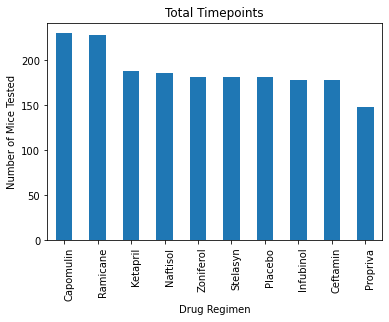

In [112]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_series = study_df_clean.groupby(['Drug Regimen']).count()['Timepoint']
sorted_ts = timepoint_series.sort_values(ascending=False)
timepoint_ax = sorted_ts.plot(kind='bar',title='Total Timepoints')
timepoint_ax.set_xticklabels(sorted_ts.index, rotation=90, rotation_mode="anchor", ha="right")
timepoint_ax.set_ylabel('Number of Mice Tested')
print(timepoint_ax)

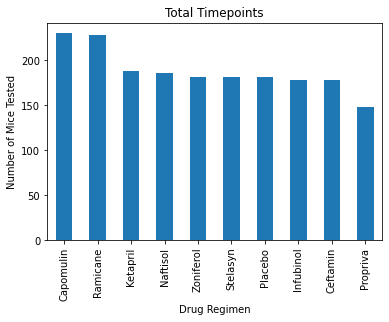

In [113]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(sorted_ts.index, sorted_ts.values, width=0.5)
plt.title('Total Timepoints')
plt.xlabel('Drug Regimen')
plt.xlim(-0.5, len(sorted_ts.index)-0.5)
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)
plt.show()

Male      958
Female    922
Name: Sex, dtype: int64


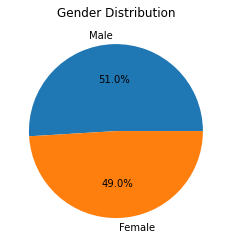

In [114]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pie = study_df_clean['Sex'].value_counts()
gender_pie.plot(kind='pie', autopct='%1.1f%%', title='Gender Distribution', label='')
print(gender_pie)


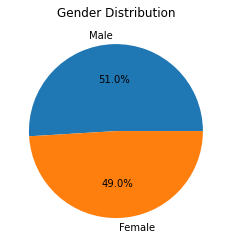

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male','Female']
plt.pie(study_df_clean['Sex'].value_counts(), labels=labels, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

## Quartiles, Outliers and Boxplots

In [116]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
tumor_greatest = study_df_clean.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint = study_df_clean['Mouse ID'].map(tumor_greatest)
study_df_clean = study_df_clean.assign(Last_Timepoint=last_timepoint)
tumor_greatest_list = study_df_clean['Tumor Volume (mm3)'].loc[study_df_clean['Timepoint'] == study_df_clean['Last_Timepoint']]
study_df_clean = study_df_clean.assign(Final_Tumor_Volume=tumor_greatest_list)
max_tumor_df = study_df_clean.dropna(subset=['Final_Tumor_Volume'])

max_tumor_df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last_Timepoint,Final_Tumor_Volume
1,f932,0,45.0,0,Ketapril,Male,15,29,0,45.0
20,x336,0,45.0,0,Naftisol,Female,4,29,0,45.0
53,h428,0,45.0,0,Ketapril,Female,1,27,0,45.0
55,v199,0,45.0,0,Naftisol,Female,17,29,0,45.0
109,o848,0,45.0,0,Stelasyn,Female,14,27,0,45.0
135,d133,0,45.0,0,Zoniferol,Male,5,30,0,45.0
155,l872,0,45.0,0,Placebo,Male,19,30,0,45.0
182,u153,0,45.0,0,Ceftamin,Female,11,25,0,45.0
194,b447,0,45.0,0,Ceftamin,Male,2,30,0,45.0
198,n482,0,45.0,0,Propriva,Female,4,29,0,45.0


In [117]:
# Narrow down the DataFrame to only those columns to chart(if needed)
tumor_df = max_tumor_df.loc[max_tumor_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
# Since the Last_Timepoint and Final_Tumor_Volume match Timepoint and Tumor Volume (mm3) respectively, we can drop those columns
tumor_df = tumor_df.drop(columns=['Last_Timepoint', 'Final_Tumor_Volume'])

In [118]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
# Create empty list to fill with potential outliers
outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartile = max_tumor_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
q1 = quartile.quantile(0.25)
q3 = quartile.quantile(0.75)
iqr = q3-q1
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)
# Determine outliers using upper and lower bounds
outliers = [x for x in max_tumor_df['Tumor Volume (mm3)'] if x > upper_bound or x < lower_bound]

# Locate the rows which contain mice on each drug and get the tumor volumes
for x in treatments[0:4]:
    tumor_vol.append(max_tumor_df.loc[max_tumor_df['Drug Regimen'] == x]['Tumor Volume (mm3)'].values)

# add subset 
treatments_dic = {treatments[0]:tumor_vol[0], treatments[1]:tumor_vol[1], treatments[2]:tumor_vol[2], treatments[3]:tumor_vol[3]}  
treatments_df = pd.DataFrame(treatments_dic)

# Highlight any potential outliers in treatments_df
mask = treatments_df.isin(outliers)
highlight_outliers = treatments_df[mask]
highlight_outliers

,Capomulin,Ramicane,Infubinol,Ceftamin
0,NaN,NaN,36.321346,NaN
1,NaN,NaN,NaN,NaN
2,30.485985,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,34.455298,31.095335,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,32.377357,36.374510,NaN,NaN
9,NaN,30.276232,NaN,NaN


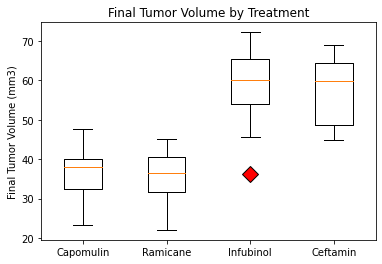

In [119]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, labels=treatments, flierprops={'marker': 'D', 'markersize': 12, 'markerfacecolor': 'red'})
plt.title('Final Tumor Volume by Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

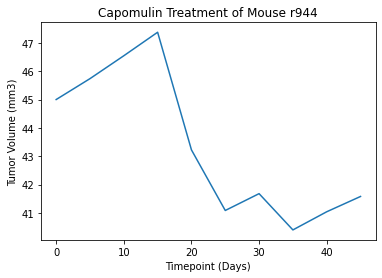

In [120]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.plot(study_df_clean.loc[study_df_clean['Mouse ID'] == 'r944']['Timepoint'], study_df_clean.loc[study_df_clean['Mouse ID'] == 'r944']['Tumor Volume (mm3)'])
plt.title('Capomulin Treatment of Mouse r944')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

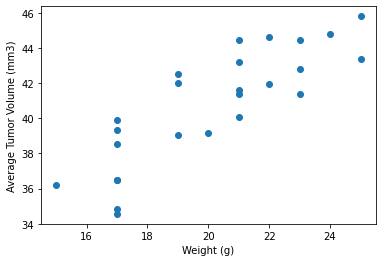

In [121]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = study_df_clean.loc[study_df_clean['Drug Regimen'] == 'Capomulin']
plt.plot(capomulin_df.groupby(['Mouse ID'])['Weight (g)'].mean(), capomulin_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean(), 'o')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


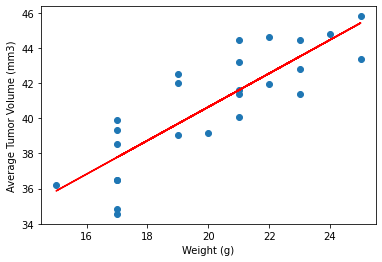

In [122]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomulin_df.groupby(['Mouse ID'])['Weight (g)'].mean(), capomulin_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean())
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
x_values = capomulin_df.groupby(['Mouse ID'])['Weight (g)'].mean()
y_values = capomulin_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [123]:
# average mouse weight by drug regimen
max_tumor_df.groupby(['Drug Regimen'])['Weight (g)'].mean()

Drug Regimen
Capomulin    20.120000
Ceftamin     27.400000
Infubinol    27.320000
Ketapril     28.080000
Naftisol     27.240000
Placebo      28.040000
Propriva     27.291667
Ramicane     20.000000
Stelasyn     27.875000
Zoniferol    27.920000
Name: Weight (g), dtype: float64

In [124]:
# looking at average mouse age by drug regimen
max_tumor_df.groupby(['Drug Regimen'])['Age_months'].mean()

Drug Regimen
Capomulin    14.040000
Ceftamin     12.800000
Infubinol    16.400000
Ketapril     14.720000
Naftisol     12.240000
Placebo      10.680000
Propriva      9.416667
Ramicane     10.840000
Stelasyn     13.125000
Zoniferol    12.600000
Name: Age_months, dtype: float64